# Heart Disease Data Exploratory

Author: Derek Ly

The purpose of this notebook is to explore the Heart Disease data acquired from UCI's data repository (https://archive.ics.uci.edu/ml/datasets/Heart+Disease). We will explore what the data looks like and how it'll interact with each other. We will also explore which features are CRUCIAL to be utilized in our ML models.

We are planning on building out the following 4 models:
* Multiple Linear Regression
* Decision Trees
* SVM
* Neural Network



# Step 0: Initialize Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load Dataset

Once we load the dataset, we'll display just the first few datapoints to see what the dataframe looks like. As we can see here, there are 14 valuable attributes/features that we'll want to be paying attention too.

Here is UCI's description of each of them:  
***  

| Attribute Name | Attribute Type | Attribute Range | Attribute Description |
|---|---|---|---|
| age | integer | 0-100 | Age of patient (in years) |
| sex | integer | 0 or 1| 0=female, 1=male |
| chest pain type| integer | 0, 1, 2, or 3 | 0=typical angina, 1=atypical angina, 2=non-anginal pain, 3=asymptomatic |
| resting blood pressure | integer |  80-200 | normal=110-120 (in mmHg)|
| serum cholestoral | integer | 100-600 (in mg/dl) | cholestoral levels |  
| fasting blood sugar | boolean | 0 or 1 | 0=false, 1=true (if patient has over 120 mg/dl)|  
| resting ecg results | integer | 0, 1, or 2 | 0=normal, 1=having ST-T wave abnormality, 2=showing probable or definite left ventricular hypertrophy by Esters criteria|  
| thalach | integer | 70-210 | maximum heart rate achieved |  
| exercise induced angina | integer | 0 or 1 | 0=false, 1=true |  
| oldpeak | float | 0-6.2 | ST depression induced by exercise relative to rest |  
| slope | integer | 1, 2, or 3 | 1=upsloping, 2=flat, 3=downsloping (the slope of the peak exercise ST segment) |  
| ca | integer | 0-3 | number of major vessels (0-3) colored by flourosopy |  
| thalassemia | integer | 1, 2, 3 | 1 = normal; 2 = fixed defect; 3 = reversable defect (A blood disorder called thalassemia) |
| target | integer | 0 or 1 | 0=no heart disease, 1=heart disease |  


In [2]:
column_names = [
    'age', 'sex', 'chest_pain', 'resting_blood_pressure', 'cholestoral', 'fasting_blood_sugar',
    'resting_ecg', 'thalach', 'exercise_induced_angina', 'oldpeak', 'slope_peak_exercise',
    'ca', 'thalassemia', 'target'
]

heart_df = pd.read_csv('heart.csv', header=0, names=column_names)
heart_df.head()

,age,sex,chest_pain,resting_blood_pressure,cholestoral,fasting_blood_sugar,resting_ecg,thalach,exercise_induced_angina,oldpeak,slope_peak_exercise,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Step 2: Observe Data

For this step, we'll proceed with the following guidance:
* Observe data balance (is it an equal amount of positives and negatives heart disease cases)
* Observe mean, median, mode of certain categories
* Observe correlation between features

In [3]:
y_label_pos = heart_df.loc[heart_df['target'] == 1]
y_label_neg = heart_df.loc[heart_df['target'] == 0]

print("Positive Labels count: ", y_label_pos['target'].count())
print("Negative Labels count: ", y_label_neg['target'].count())

Positive Labels count:  165
Negative Labels count:  138


In [4]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age                        303 non-null int64
sex                        303 non-null int64
chest_pain                 303 non-null int64
resting_blood_pressure     303 non-null int64
cholestoral                303 non-null int64
fasting_blood_sugar        303 non-null int64
resting_ecg                303 non-null int64
thalach                    303 non-null int64
exercise_induced_angina    303 non-null int64
oldpeak                    303 non-null float64
slope_peak_exercise        303 non-null int64
ca                         303 non-null int64
thalassemia                303 non-null int64
target                     303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
heart_df.describe()

,age,sex,chest_pain,resting_blood_pressure,cholestoral,fasting_blood_sugar,resting_ecg,thalach,exercise_induced_angina,oldpeak,slope_peak_exercise,ca,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


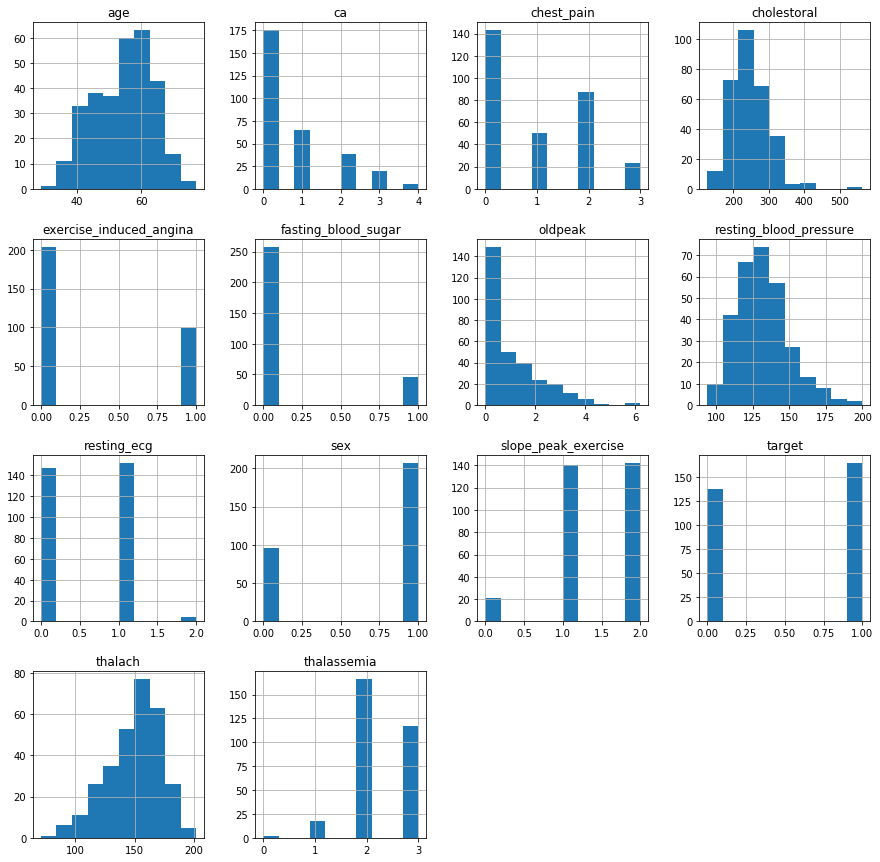

In [6]:
fig = heart_df.hist(figsize=(15,15))

# Step 3: Transform Data

As we can see from above, the histograms show us data that are categorical. We would need to change these to something that an ML model can actually use. We will also observe that we have an imbalance of data in males and females.

Once we take care of these categorical values, we can easily use the dummy function to take care of them for us. From here, we will export this new data into another file called 'heart_processed.csv'. We can now build ML models to utilize this data that we've cleaned and preprocessed. 

In [7]:
pd.options.mode.chained_assignment = None

heart_df['sex'][heart_df['sex'] == 0] = 'female'
heart_df['sex'][heart_df['sex'] == 1] = 'male'

heart_df['chest_pain'][heart_df['chest_pain'] == 0] = 'typical angina'
heart_df['chest_pain'][heart_df['chest_pain'] == 1] = 'atypical angina'
heart_df['chest_pain'][heart_df['chest_pain'] == 2] = 'non-anginal pain'
heart_df['chest_pain'][heart_df['chest_pain'] == 3] = 'asymptomatic'

heart_df['fasting_blood_sugar'][heart_df['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
heart_df['fasting_blood_sugar'][heart_df['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

heart_df['resting_ecg'][heart_df['resting_ecg'] == 0] = 'normal'
heart_df['resting_ecg'][heart_df['resting_ecg'] == 1] = 'ST-T wave abnormality'
heart_df['resting_ecg'][heart_df['resting_ecg'] == 2] = 'left ventricular hypertrophy'

heart_df['exercise_induced_angina'][heart_df['exercise_induced_angina'] == 0] = 'no'
heart_df['exercise_induced_angina'][heart_df['exercise_induced_angina'] == 1] = 'yes'

heart_df['slope_peak_exercise'][heart_df['slope_peak_exercise'] == 1] = 'upsloping'
heart_df['slope_peak_exercise'][heart_df['slope_peak_exercise'] == 2] = 'flat'
heart_df['slope_peak_exercise'][heart_df['slope_peak_exercise'] == 3] = 'downsloping'

heart_df['thalassemia'][heart_df['thalassemia'] == 1] = 'normal'
heart_df['thalassemia'][heart_df['thalassemia'] == 2] = 'fixed defect'
heart_df['thalassemia'][heart_df['thalassemia'] == 3] = 'reversable defect'

heart_df.head()

,age,sex,chest_pain,resting_blood_pressure,cholestoral,fasting_blood_sugar,resting_ecg,thalach,exercise_induced_angina,oldpeak,slope_peak_exercise,ca,thalassemia,target
0,63,male,asymptomatic,145,233,greater than 120mg/ml,normal,150,no,2.3,0,0,normal,1
1,37,male,non-anginal pain,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,0,0,fixed defect,1
2,41,female,atypical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,flat,0,fixed defect,1
3,56,male,atypical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,flat,0,fixed defect,1
4,57,female,typical angina,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,flat,0,fixed defect,1


In [8]:
heart_df = pd.get_dummies(heart_df, drop_first=True)
heart_df.head()

,age,resting_blood_pressure,cholestoral,thalach,oldpeak,ca,target,sex_male,chest_pain_atypical angina,chest_pain_non-anginal pain,chest_pain_typical angina,fasting_blood_sugar_lower than 120mg/ml,resting_ecg_left ventricular hypertrophy,resting_ecg_normal,exercise_induced_angina_yes,slope_peak_exercise_flat,slope_peak_exercise_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
0,63,145,233,150,2.3,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0
1,37,130,250,187,3.5,0,1,1,0,1,0,1,0,0,0,0,0,1,0,0
2,41,130,204,172,1.4,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0
3,56,120,236,178,0.8,0,1,1,1,0,0,1,0,0,0,1,0,1,0,0
4,57,120,354,163,0.6,0,1,0,0,0,1,1,0,0,1,1,0,1,0,0


In [9]:
heart_df.to_csv('heart_processed.csv')